In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()

In [3]:
X = iris.data[:,2:] #petal length and width

In [4]:
y = iris.target

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

splitter: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.

max_features: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.

If an integer is inputted then it considers that value as max features at each split.
If float value is taken then it shows the percentage of features at each split.
If “auto” or “sqrt” is taken then max_features=sqrt(n_features).
If “log2” is taken then max_features= log2(n_features).
If None, then max_features=n_features. By default, it takes “None” value.

max_depth: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.

min_samples_split: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.

min_samples_leaf: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.

max_leaf_nodes: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.

min_impurity_split: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.

In [6]:
tree_clf = DecisionTreeClassifier(max_depth=2)

In [7]:
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
from sklearn.tree import export_graphviz
#from IPython.display import Image  
export_graphviz(tree_clf,out_file = "iris_tree.dot",
                feature_names=iris.feature_names[2:],class_names = iris.target_names,rounded = True,filled = True)
#To output a graph definition file called iris_tree.dot

#!dot iris_tree.dot -Tpng -o iris_tree.png #.dot file can be converted to a variety of formats such as PDF or PNG

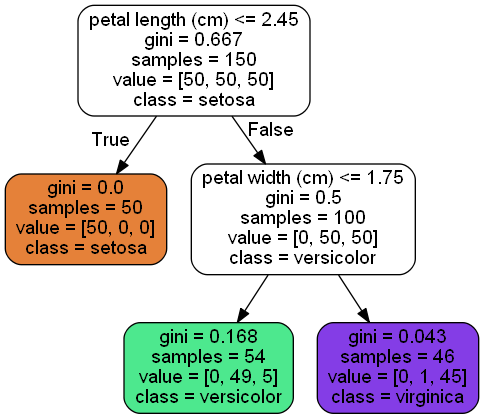

In [77]:
import os
os.environ["PATH"]+=os.environ['PATH']+';'+r'C:\Users\Administrator\Anaconda3\Lib\site-packages\graphviz'
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data,  
                filled=True, rounded=True,feature_names=iris.feature_names[2:],class_names = iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Suppose you find an Iris Flower and you want to classify it,as you start at the root node(depth 0,at the top):this asks whether the flower's petal length is smaller than 2.45cm,if it is then you move down to the root's left child node(depth 1 ,left).In this case it is a leaf node(it does not have any children nodes)so it does not ask any questions and you can simply look at the predicted class for that node and the Decision Tree predicts that your flower is an Iris Setosa

Now you found another flower this time the petal length is greaeter than 2.45cm,you must move down to the root's right child node(depth 1,right)which is not a leaf node,so it asks another question,is the petal width smaller than 1.75cm?if it is then your flower is most likely an Iris-Versicolor(depth 2 ,left),if not it is likely an Iris-Virginica(depth 2,right)
#Thus they  very little data to prepare 

In [64]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

Thus if you have a flower whose petals are 5cm long and 1.5cm wide,the corresponding leaf node is the depth 2,left node,so the Decsion Tree gives the following probabilites:0% for Iris Setosa(0/54),90.7% for Iris Versicolor(49/54)and 0.09% for Iris-Virginica(5/54)

In [65]:
tree_clf.predict([[5,1.5]]) #it will output the class Iris-Versicolor(class1) since it has the highest probability

array([1])

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()

In [25]:
X = iris.data[:,2:]

In [26]:
y = iris.target

In [30]:
tree_reg = DecisionTreeRegressor(max_depth = 2)

In [31]:
tree_reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [32]:
tree_reg.predict([[5,1.5]])

array([1.09259259])

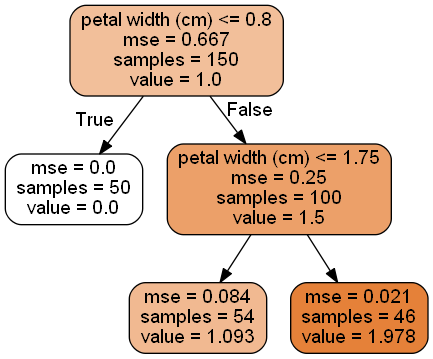

In [41]:
import os
from sklearn.tree import export_graphviz
#os.environ["PATH"]+=os.environ['PATH']+';'+r'C:\Users\Saketh\Anaconda3\Library\bin\graphviz'
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(tree_reg, out_file=dot_data,  
                filled=True, rounded=True,feature_names=iris.feature_names[2:],class_names = iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

The main difference is that instead of predicting a class in each node,it predicts a value,the prediction is simply the average target value of the training instances associated to the leaf node,which results in Mean Square Error.